In [1]:
# Import necessary libraries
import matplotlib.pyplot as plt
import os
import pandas as pd
from google.colab import drive
# 1. Mount Google Drive
# This step will prompt you to authorize Google Colab to access your Google Drive.
# Follow the instructions in the output to complete the authentication.
print("Mounting Google Drive...")
drive.mount('/content/drive/')
print("Google Drive mounted successfully!")


Mounting Google Drive...
Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
Google Drive mounted successfully!


In [2]:
# 2. Define the path to your CSV files
# IMPORTANT: Replace 'Your_Folder_Name' with the actual name of the folder
# containing your CSV files in Google Drive.
# For example, if your folder is named 'my_csv_data' and it's directly in 'My Drive',
# the path would be '/content/drive/My Drive/my_csv_data'.
csv_folder_path = '/content/drive/My Drive/LSTM_results'

In [3]:




# Check if the folder exists
if not os.path.exists(csv_folder_path):
    print(f"Error: Folder not found at '{csv_folder_path}'")
    print("Please make sure the folder name is correct and it exists in your Google Drive.")
else:
    print(f"Accessing folder: {csv_folder_path}")

    # 3. List all CSV files in the specified folder
    csv_files = [f for f in os.listdir(csv_folder_path) if f.endswith('.csv')]

    if not csv_files:
        print(f"No CSV files found in '{csv_folder_path}'. Please check the folder content.")
    else:
        print(f"Found {len(csv_files)} CSV files:")
        for f in csv_files:
            print(f"- {f}")

        # 4. Initialize an empty list to store DataFrames
        all_dfs = []

        # 5. Loop through each CSV file, read it into a DataFrame, and append to the list
        print("\nReading and appending CSV files...")
        for csv_file in csv_files:
            file_path = os.path.join(csv_folder_path, csv_file)
            try:
                df = pd.read_csv(file_path)
                all_dfs.append(df)
                print(f"Successfully read: {csv_file}")
            except Exception as e:
                print(f"Error reading {csv_file}: {e}")

        # 6. Concatenate all DataFrames into a single DataFrame
        if all_dfs:
            try:
                combined_df = pd.concat(all_dfs, ignore_index=True)
                print("\nAll CSV files successfully combined into one DataFrame!")
                print("\nCombined DataFrame Info:")
                combined_df.info()
                print("\nFirst 5 rows of the combined DataFrame:")
                print(combined_df.head())
                print(f"\nTotal rows in combined DataFrame: {len(combined_df)}")
            except Exception as e:
                print(f"Error concatenating DataFrames: {e}")
        else:
            print("No DataFrames were successfully read to combine.")

# Optional: Save the combined DataFrame to a new CSV file in your Google Drive
# output_path = '/content/drive/My Drive/combined_data.csv'
# if 'combined_df' in locals(): # Check if combined_df was created
#     try:
#         combined_df.to_csv(output_path, index=False)
#         print(f"\nCombined DataFrame saved to: {output_path}")
#     except Exception as e:
#         print(f"Error saving combined DataFrame: {e}")

Accessing folder: /content/drive/My Drive/LSTM_results
Found 39 CSV files:
- 12305000_result_df_202505221324.csv
- 12305000_result_df_202505221328.csv
- 12305000_result_df_202505221332.csv
- 12305000_result_df_202505221334.csv
- 12305000_result_df_202505221407.csv
- 12305000_result_df_202505221413.csv
- 12305000_result_df_202505222132.csv
- 12305000_result_df_202505222135.csv
- 12305000_result_df_202505222142.csv
- 12305000_result_df_202505222147.csv
- 12305000_result_df_202505222153.csv
- 12305000_result_df_202505222158.csv
- 12305000_result_df_202505222204.csv
- 12305000_result_df_202505222208.csv
- 12305000_result_df_202505222318.csv
- 12322000_result_df_202505222324.csv
- 12322000_result_df_202505222341.csv
- 12322000_result_df_202505222343.csv
- 12322000_result_df_202505222347.csv
- 12322000_result_df_202505222352.csv
- 13154500_result_df_202505231609.csv
- 13154500_result_df_202505231615.csv
- 13154500_result_df_202505231619.csv
- 13154500_result_df_202505231632.csv
- 13154500_re

In [4]:
combined_df.sort_values(by=['KGE'])

,train_month,h1,h2,d1,d2,batch,look_back,optimizer,learning_rate,rmse,bias,KGE,model_site,r2
30,"[3, 4, 5, 6, 7, 8]",200,50,0.05,0.005,8,12,<keras.src.optimizers.adam.Adam object at 0x7a...,0.001,1.126421,-0.129558,[0.85847544],13342500.0,0.868980
20,"[3, 4, 5, 6, 7, 8]",400,50,0.05,0.005,8,32,<keras.src.optimizers.adam.Adam object at 0x7e...,0.001,0.452400,-0.130723,[0.87408875],13154500.0,0.912975
33,"[3, 4, 5, 6, 7, 8]",200,25,0.05,0.005,8,48,<keras.src.optimizers.adam.Adam object at 0x7c...,0.001,0.963371,-0.047730,[0.88142152],13342500.0,0.905942
31,"[3, 4, 5, 6, 7, 8]",200,25,0.05,0.005,8,12,<keras.src.optimizers.adam.Adam object at 0x7d...,0.001,1.013980,-0.211269,[0.8828331],13342500.0,0.891426
29,"[3, 4, 5, 6, 7, 8]",400,50,0.05,0.005,8,24,<keras.src.optimizers.adam.Adam object at 0x79...,0.001,1.145810,-0.342795,[0.88452661],13342500.0,0.877681
32,"[3, 4, 5, 6, 7, 8]",200,25,0.05,0.005,8,24,<keras.src.optimizers.adam.Adam object at 0x7a...,0.001,1.173772,-0.297535,[0.88548436],13342500.0,0.876438
28,"[3, 4, 5, 6, 7, 8]",400,50,0.05,0.005,8,12,<keras.src.optimizers.adam.Adam object at 0x78...,0.001,1.052121,-0.112615,[0.89241394],13342500.0,0.878768
35,"[3, 4, 5, 6, 7, 8]",200,50,0.05,0.005,8,45,<keras.src.optimizers.adam.Adam object at 0x7f...,0.001,1.175428,-0.239298,[0.89740864],13342500.0,0.885110
17,"[3, 4, 5, 6, 7, 8]",200,50,0.05,0.005,8,64,<keras.src.optimizers.adam.Adam object at 0x7e...,0.001,1.834908,0.943032,[0.89872937],NaN,NaN
36,"[3, 4, 5, 6, 7, 8]",100,25,0.05,0.005,8,80,<keras.src.optimizers.adam.Adam object at 0x7f...,0.001,1.004835,-0.201481,[0.90457632],13342500.0,0.901382


In [5]:



result =  combined_df.groupby('model_site').agg({'rmse': 'max', 'KGE': 'max'})

print(result)

                rmse           KGE
model_site                        
13154500.0  0.513110  [0.97042483]
13342500.0  1.205032  [0.94022154]


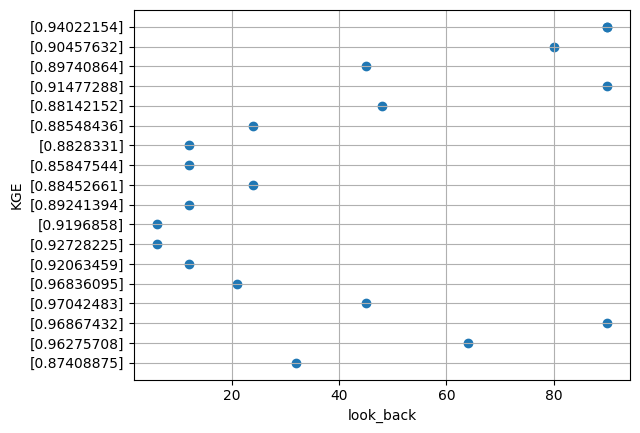

In [6]:
x='look_back'
y='KGE'

combined_df=combined_df.dropna()

# Scatter plot of two columns
plt.scatter( combined_df[  x],  combined_df[ y])
plt.xlabel( x)
plt.ylabel( y )
plt.title( '')
plt.grid(True)
plt.show()


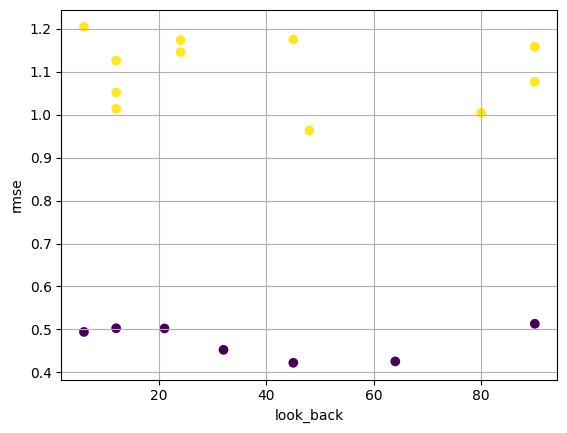

In [7]:
x='look_back'
y='rmse'

combined_df=combined_df.dropna()

# Scatter plot of two columns
plt.scatter( combined_df[  x],  combined_df[ y] , c= combined_df['model_site'] )
plt.xlabel( x)
plt.ylabel( y )
plt.title('' )
plt.grid(True)
plt.show()